In [17]:
import pandas as pd

data = pd.read_csv('hoteis.csv')

data.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [18]:
# Correlation

correlation = data.corr()

correlation['Preco']

Estrelas              0.401099
ProximidadeTurismo   -0.697142
Capacidade            0.531866
Preco                 1.000000
Name: Preco, dtype: float64

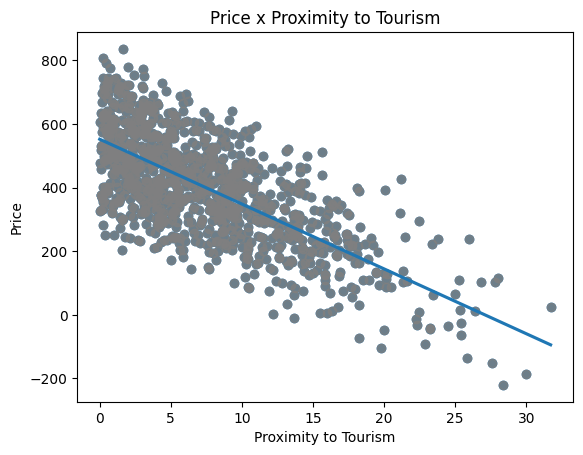

In [19]:
# Relation variables

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.scatter(data['ProximidadeTurismo'], data['Preco'])

sns.regplot(x=data['ProximidadeTurismo'], y=data['Preco'], ci=None, scatter_kws={'color':'gray'})

plt.title('Price x Proximity to Tourism')
plt.xlabel('Proximity to Tourism')
plt.ylabel('Price')
plt.show()

In [20]:
# Which straight line best fits the relationship?
px.scatter(data, x='ProximidadeTurismo', y='Preco', trendline_color_override='red', trendline="ols")

In [33]:
# Which straight line best fits the relationship? IA

px.scatter(data, x='ProximidadeTurismo', y='Preco', trendline_color_override='red', trendline="lowess")

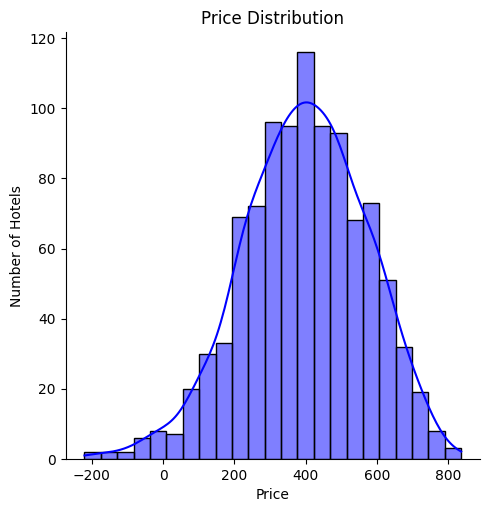

In [22]:
sns.displot(data['Preco'], kde=True, color='blue')

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Hotels')
plt.show()

In [34]:
# Separating into training and testing

from sklearn.model_selection import train_test_split

# Defining y e X
y = data['Preco']
x = data.drop(columns = 'Preco')

In [35]:
# Applying the split of y and X

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [36]:
# Training data to use the formula

df_train = pd.DataFrame(data = X_train)
df_train['Preco'] = y_train

In [37]:
''' 
General Interpretation
The regression model indicates a significant inverse relationship 
between ProximityTourism and Price, 
with a moderate explanatory power (𝑅2=0.492R 2=0.492). 
Greater proximity to tourism seems to reduce the price, and this 
relationship is statistically significant.'''


# import ols

from statsmodels.formula.api import ols

model_0 = ols('Preco ~ ProximidadeTurismo', data=df_train).fit()

print(model_0.summary())



                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     707.1
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          3.88e-108
Time:                        09:51:05   Log-Likelihood:                -4351.8
No. Observations:                 700   AIC:                             8708.
Df Residuals:                     698   BIC:                             8717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            554.3832      7

In [27]:
model_0.params

Intercept             552.705711
ProximidadeTurismo    -20.562205
dtype: float64

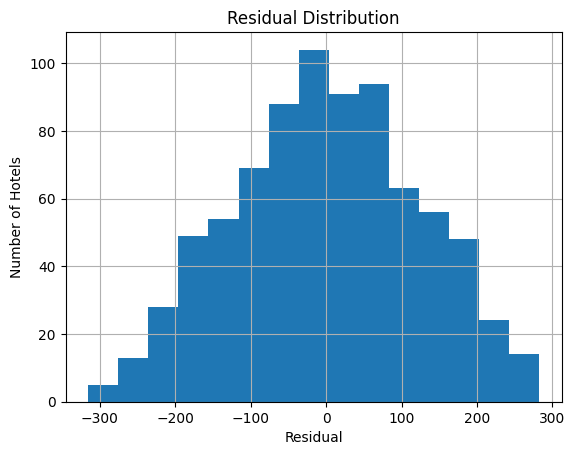

In [28]:
# How they are distributed

model_0.resid.hist(bins=15)

plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Number of Hotels')
plt.show()

## Obtaining the R² of the forecast

In [38]:
# defining the expected Y

y_pred = model_0.predict(X_test)


In [40]:
# import the r2_score

from sklearn.metrics import r2_score

print( 'R²: ', r2_score(y_test, y_pred))

R²:  0.44303404083652564


## Analyzing the factors

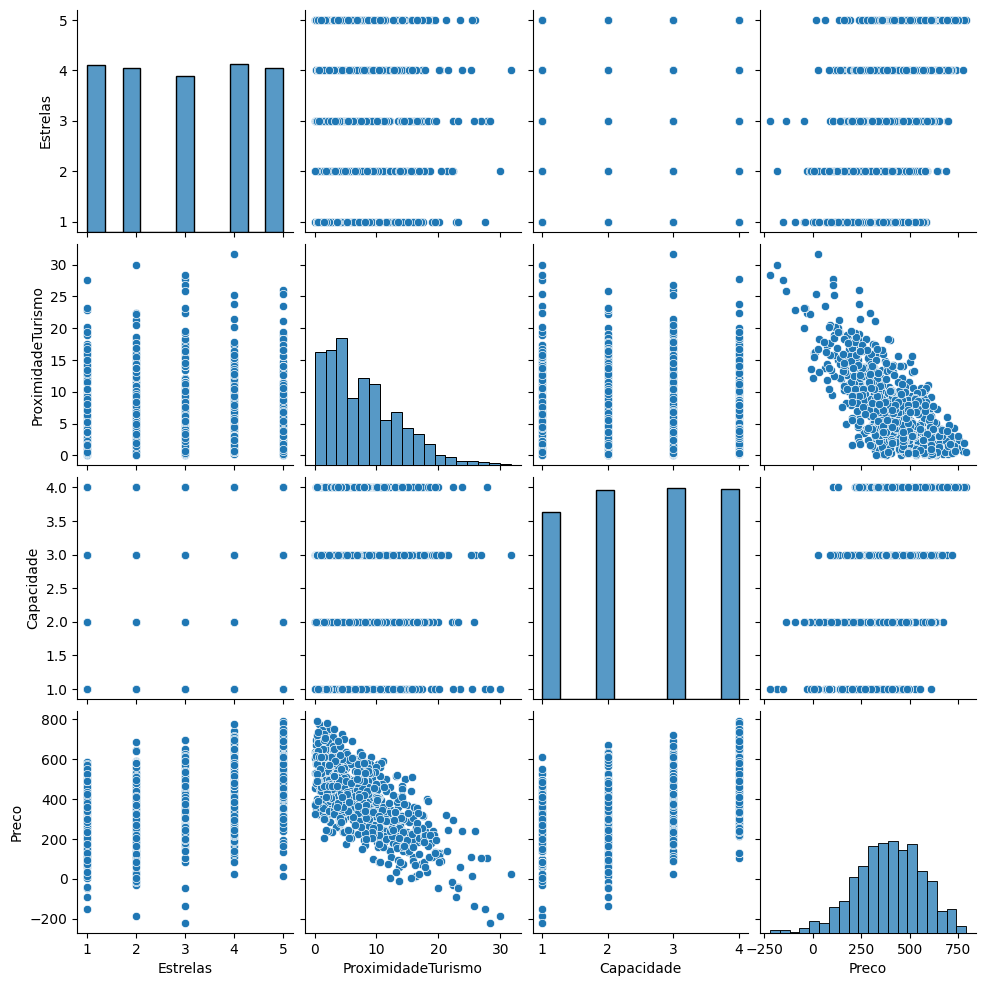

In [44]:
# What other characteristics could explain hotel prices?

sns.pairplot(df_train, height=2.5)
plt.show()

In [45]:
data.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

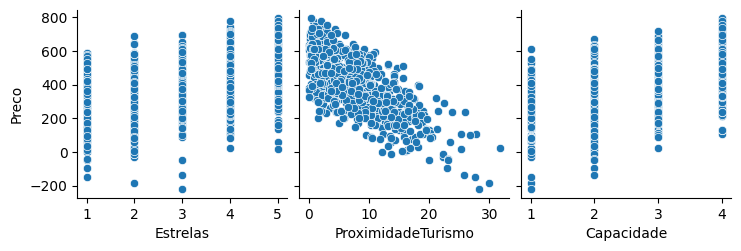

In [46]:
# Let's just look at y_vars='preco'
sns.pairplot(df_train, y_vars='Preco', x_vars=['Estrelas', 'ProximidadeTurismo', 'Capacidade'],height=2.5)

## Adding factors to the model

In [47]:
# importing the api do stasmodels
import statsmodels.api as sm

In [48]:
# Adding the constant
X_train = sm.add_constant(X_train)
X_train.head()

,const,Estrelas,ProximidadeTurismo,Capacidade
541,1.0,4,1.464408,4
440,1.0,4,4.026255,2
482,1.0,3,4.012978,4
422,1.0,2,10.156653,1
778,1.0,5,18.081439,2


In [49]:
# Creating the regression model (without formula): saturated

model_1 = sm.OLS(y_train, X_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2791.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:07:22   Log-Likelihood:                -3698.0
No. Observations:                 700   AIC:                             7404.
Df Residuals:                     696   BIC:                             7422.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                191.7119      6

In [51]:
model_1.params

const                 191.711948
Estrelas               49.974556
ProximidadeTurismo    -19.732298
Capacidade             80.911108
dtype: float64

The summary refers to the results of a **multiple linear regression** performed using the ordinary least squares (OLS) method. The goal of the analysis was to model the relationship between price (**Preco**, dependent variable) and three explanatory variables: **Estrelas** (stars), **ProximidadeTurismo** (proximity to tourism), and **Capacidade** (capacity).

### Interpretation of Results:

#### 1. **Model Quality** (general statistics):
- **R-squared (R²)**: 0.923.
  - Indicates that 92.3% of the variation in price (**Preco**) is explained by the variables in the model. A high value suggests that the model captures the relationship well.
- **Adj. R-squared (adjusted R²)**: 0.923.
  - Adjusted for the number of variables in the model to avoid bias. Here, it is nearly identical to R², indicating the model is parsimonious.
- **F-statistic**: 2791.
  - Tests whether the model is statistically significant overall. The associated probability (Prob F-statistic: 0.00) confirms that the model is significant.
- **AIC (Akaike Information Criterion)** and **BIC (Bayesian Information Criterion)**: Metrics for comparing models. Lower values indicate a better fit, though they are most useful for comparing multiple models.

#### 2. **Model Coefficients**:
The coefficients show how the explanatory variables impact the dependent variable (**Preco**). 

| **Variable**            | **Coefficient** | **Interpretation**                                                                                 |
|-------------------------|-----------------|---------------------------------------------------------------------------------------------------|
| **const (intercept)**   | 191.7119        | The estimated average price is 191.71 when all explanatory variables are zero.                   |
| **Estrelas**            | 49.9746         | An increase of one star is associated with an average price increase of 49.97.                   |
| **ProximidadeTurismo**  | -19.7323        | For each unit increase in distance from tourist spots, the average price decreases by 19.73.      |
| **Capacidade**          | 80.9111         | Each increase in capacity is associated with an average price increase of 80.91.                 |

All coefficients are highly significant (**P>|t| = 0.000**).

#### 3. **Model Diagnostics**:
- **Durbin-Watson**: 2.014.
  - Checks for autocorrelation in the residuals. Values close to 2 indicate little to no autocorrelation, which is desirable.
- **Omnibus**, **Jarque-Bera**: Test residual normality.
  - Since the p-values for these tests are greater than 0.05 (Omnibus: 0.166; Jarque-Bera: 0.159), there is no evidence to reject the hypothesis of normality in the residuals.

#### 4. **Confidence Intervals**:
- The 95% confidence intervals for each coefficient are provided in the table. For instance, for **Estrelas**, the coefficient ranges from 47.476 to 52.474, reinforcing the precision of the estimate.

---

### Conclusions:
1. The model is well-fitted and statistically significant.
2. Price (**Preco**) increases with **stars** and **capacity**, but decreases as **proximity to tourist spots** increases (i.e., farther away means lower price).
3. There is no indication of issues with autocorrelation or residual normality.